PEMS数据集
美国加利福尼亚州公路数据（Caltrans Performance Measurement System，PeMS），网址：https://pems.dot.ca.gov/    
[参考](https://blog.csdn.net/stt666/article/details/122360673)  
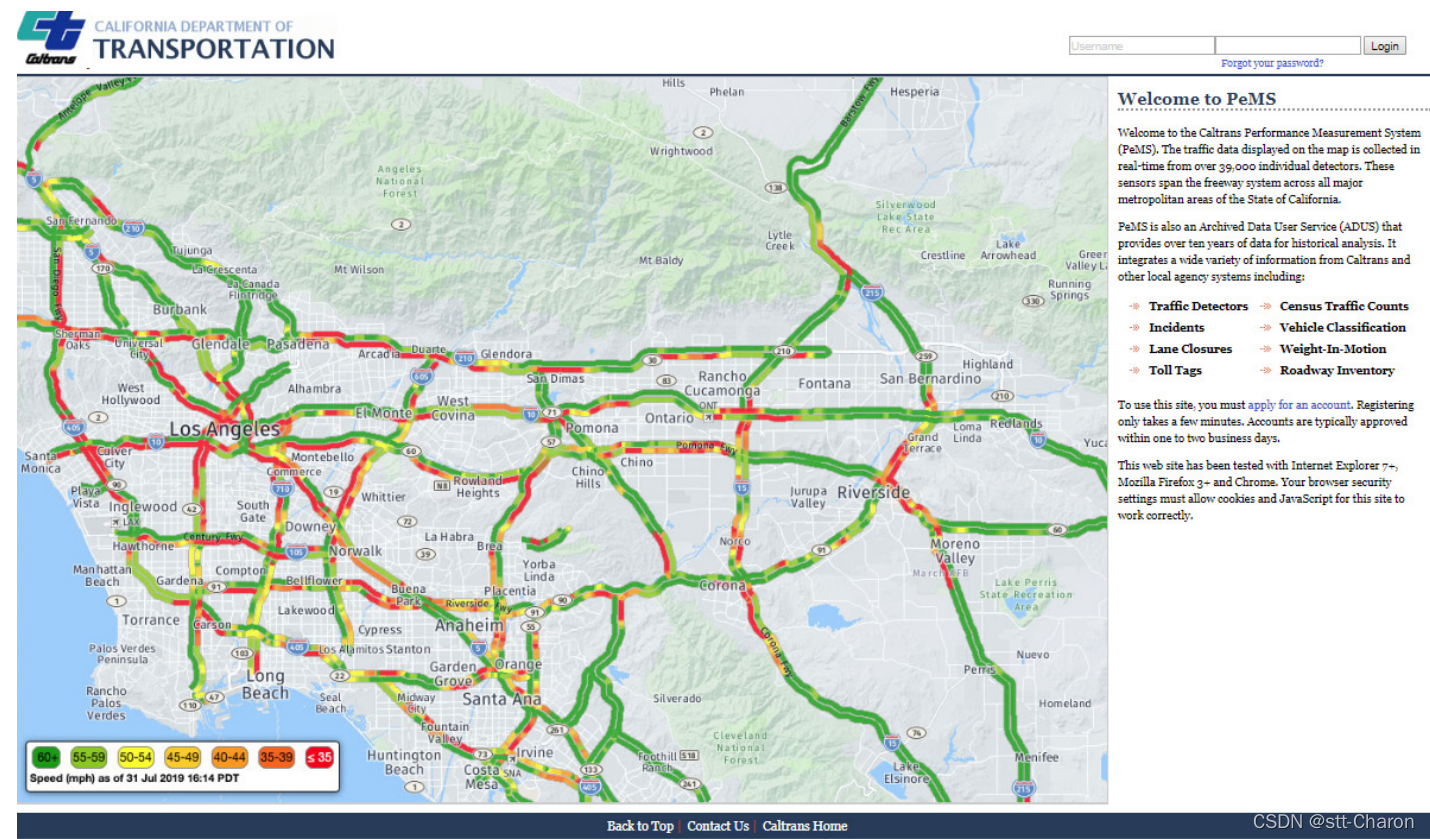  

**PEMS04**  
PEMS04是2018年1月1日开始采集的连续59天的307的探测器获得的流量数据，每5分钟采集一次，所以原始流量数据data.npz读取后shape为(307, 16992, 3)，其中3维特征为flow, occupy, speed，原始邻接矩阵数据是一个distance.csv文件，它包含是from,to,distance的格式。为方便起见，部分模型简化了邻接矩阵，距离（对应图上的边权）只要节点相连都取1。

**PEMS08**  
PEMS08是2016年7月1日开始采集的连续62天170个节点的流量数据，其数据shape为(170, 17856, 3)。  


下图是对PEMS04中224号节点一天内的三种采集数据的可视化，可以看到只有流量数据起伏比较大，因此本文也只采用流量数据进行预测。  
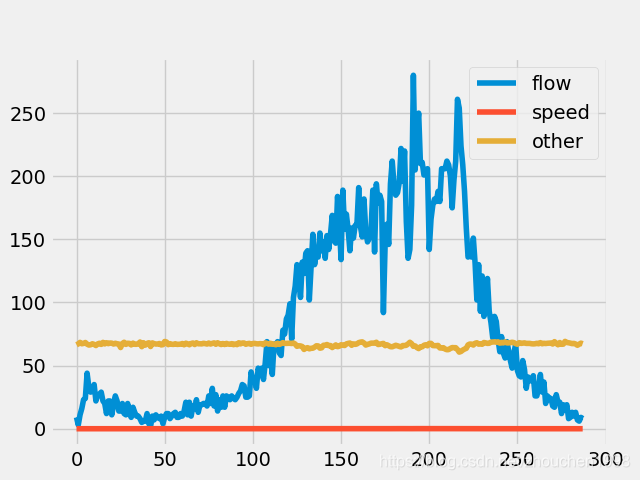

### Plot Raw Data

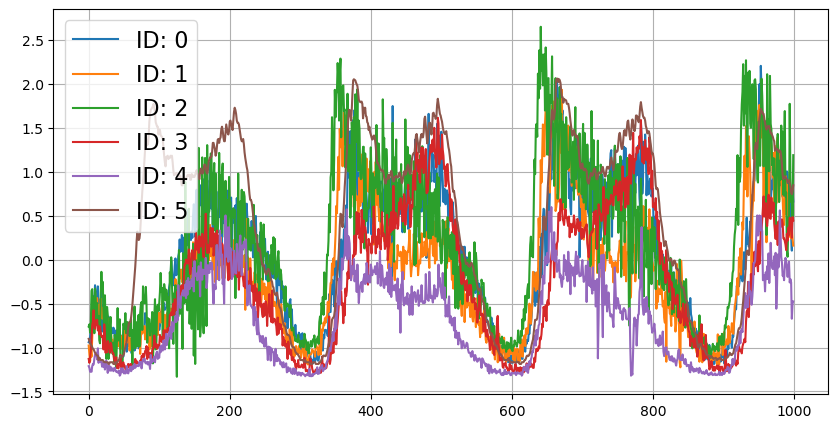

<Figure size 1000x500 with 0 Axes>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils.serialization import load_pkl

def plot_raw_data_multi_variable(data: np.array, node_ids: int, begin_time: int = None, end_time: int = None, line_width: float = 1.5, font_size: int = 16, figure_size: tuple = (10, 5)):
    """plot raw data.

    Args:
        data (np.array): raw data with shape [num_time_slices, num_time_series, num_features].
        selected_node_id (int): selected time series.
        begin_time (int, optional): begin time. Defaults to None.
        end_time (int, optional): end time. Defaults to None.
        line_width (float, optional): line width. Defaults to 1.5.
        font_size (int, optional): font size. Defaults to 16.
        color (str, optional): color. Defaults to "green".
        figure_size (tuple, optional): figure size. Defaults to (10, 5).
    """
    time_span = data.shape[0]
    assert begin_time < end_time, "begin_time should be less than end_time"
    # assert begin_time >= 0, "begin_time should be greater than or equal to 0"
    assert end_time <= time_span, "end_time should be less than or equal to {0}".format(time_span)
    plt.rcParams['figure.figsize'] = figure_size
    for selected_node_id in node_ids:
        plot_data = data[begin_time:end_time, selected_node_id, 0]
        plot_index = np.arange(plot_data.shape[0])
        plt.plot(plot_index, plot_data, linewidth=line_width, label="ID: {0}".format(selected_node_id))
    plt.grid()
    plt.legend(fontsize=font_size)
    plt.show()
    plt.clf()

plot_ids=[0, 1,2,3,4,5]
data_file_path = "../datasets/PEMS04/data_in_336_out_336_rescale_True.pkl"
data = load_pkl(data_file_path)["processed_data"]

plot_raw_data_multi_variable(data=data, node_ids=plot_ids, begin_time=0, end_time=1000, line_width=1.5, font_size=16, figure_size=(10, 5))

### Visualize Electricity

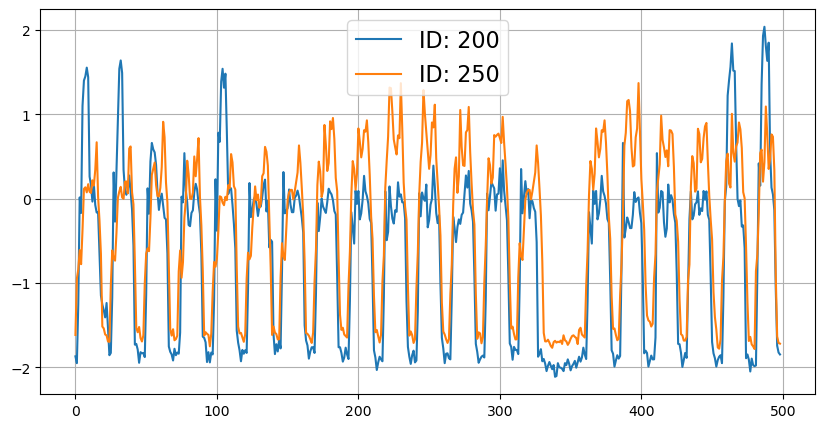

<Figure size 1000x500 with 0 Axes>

In [2]:
plot_ids=[200, 250]
data_file_path = "../datasets/Electricity/data_in_336_out_336_rescale_False.pkl"
data = load_pkl(data_file_path)["processed_data"]

plot_raw_data_multi_variable(data=data, node_ids=plot_ids, begin_time=-500, end_time=-1, line_width=1.5, font_size=16, figure_size=(10, 5))

In [21]:
import pandas as pd

df = pd.read_csv("../datasets/raw_data/ExchangeRate/ExchangeRate.csv",index_col=0)
df

,0,1,2,3,4,5,6,OT
date,,,,,,,,
1990/1/1 0:00,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1990/1/2 0:00,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
1990/1/3 0:00,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
1990/1/4 0:00,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
1990/1/5 0:00,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...
2010/10/6 0:00,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
2010/10/7 0:00,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
2010/10/8 0:00,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943


<Axes: xlabel='date'>

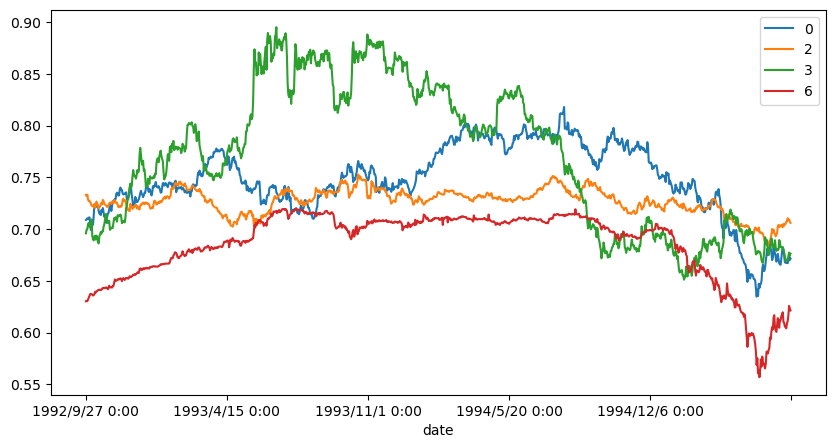

In [27]:
df[["0","2","3","6"]][1000:2000].plot()